In [13]:
#Downloading data.

import pandas as pd
from downloading_data import *
paths = download_datasets()
df = pd.read_csv(paths[0] + '\\life expectancy.csv')
df.rename(columns={'Life Expectancy World Bank': 'Life Expectancy'}, inplace=True)
df


Path to dataset files: C:\Users\karti\.cache\kagglehub\datasets\mjshri23\life-expectancy-and-socio-economic-world-bank\versions\1
Path to dataset files: C:\Users\karti\.cache\kagglehub\datasets\mahdiehhajian\life-expectancy-around-the-world\versions\1
Path to dataset files: C:\Users\karti\.cache\kagglehub\datasets\iamsouravbanerjee\life-expectancy-at-birth-across-the-globe\versions\2


,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.45870,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


## Carbon Emissions on Life Expectancy

In [16]:
!pip install pingouin

  Using cached pingouin-0.5.5-py3-none-any.whl.metadata (19 kB)
  Using cached pandas_flavor-0.6.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached pingouin-0.5.5-py3-none-any.whl (204 kB)
Using cached pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.8 MB 7.4 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 8.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.8 MB 8.2 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 8.4 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 7.1 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 7.0 MB/s eta 0:00:00
Using cached tabulate-

In [ ]:
#Partial Correlation
import pingouin as pg

data = df[['Life Expectancy', 'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']]
data = data.dropna()
partial_corr = pg.partial_corr(data=data, x='CO2', y='Life Expectancy', covar=['Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable'])
print(partial_corr)

           n         r           CI95%     p-val
pearson  332 -0.127996  [-0.23, -0.02]  0.021194


In [ ]:
#Pearson Correlation
corr_co2, _ = pearsonr(data['CO2'], data['Life Expectancy'])
print(f'Pearson correlation (CO2 vs. Life Expectancy): {corr_co2}')

Pearson correlation (CO2 vs. Life Expectancy): 0.09369354505025591


## Healthcare on Life Expectancy

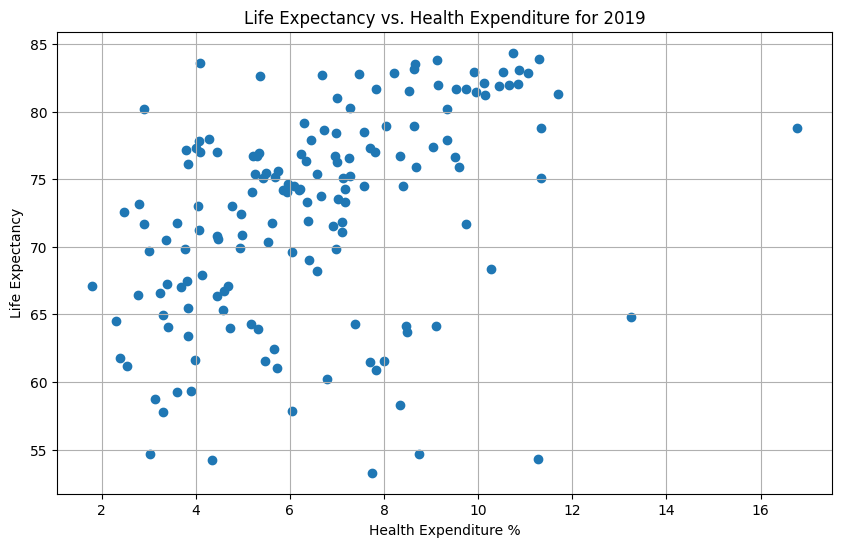

In [ ]:
import matplotlib.pyplot as plt


recent_year = df['Year'].max()
recent_data = df[df['Year'] == recent_year]
recent_data = recent_data.dropna(subset=['Life Expectancy', 'Health Expenditure %'])

plt.figure(figsize=(10, 6))
plt.scatter(recent_data['Health Expenditure %'], recent_data['Life Expectancy'])
plt.xlabel('Health Expenditure %')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Health Expenditure for 2019')
plt.grid(True)
plt.show()

Pearson correlation: 0.4094010012861828


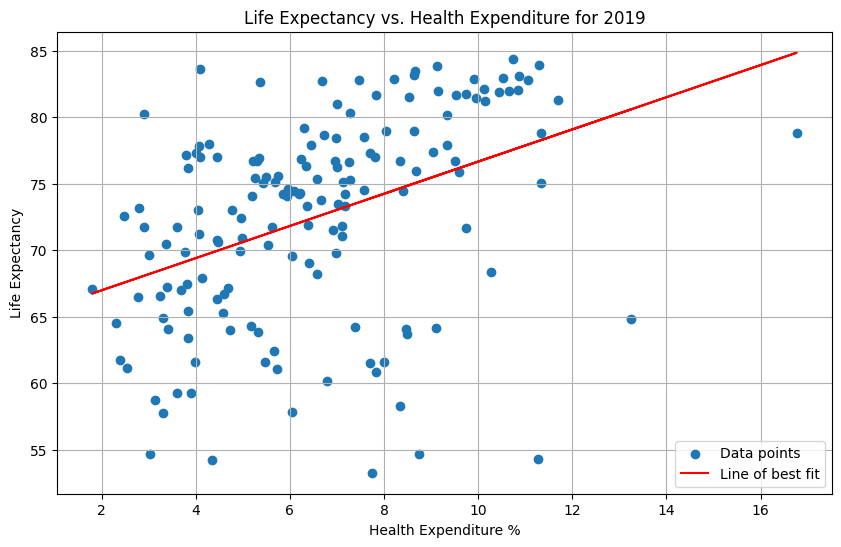

In [ ]:
import numpy as np
from scipy.stats import pearsonr

#Peason correlation coefficient.
x = recent_data['Health Expenditure %']
y = recent_data['Life Expectancy']
corr, _ = pearsonr(x, y)
print(f'Pearson correlation: {corr}')

# Line of best fit.
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data points')
plt.plot(x, m*x + b, color='red', label='Line of best fit')
plt.xlabel('Health Expenditure %')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Health Expenditure for 2019')
plt.legend()
plt.grid(True)
plt.show()

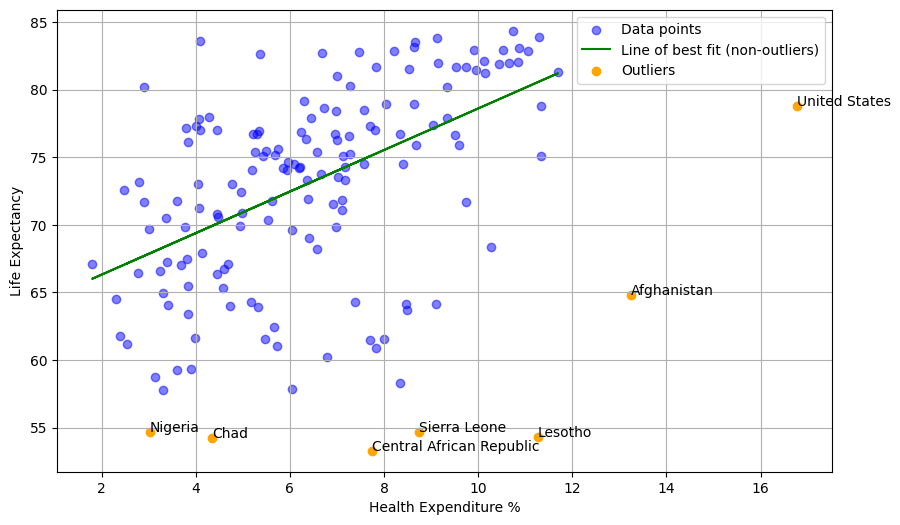

New Pearson correlation (Health Expenditure % vs. Life Expectancy) without outliers: 0.5240481278861273


In [ ]:
from scipy.stats import zscore


# Outliers via Z-scores
z_scores = np.abs(zscore(recent_data[['Health Expenditure %', 'Life Expectancy']]))
outliers = (z_scores > 2).any(axis=1)


outlier_data = recent_data[outliers]
x_outliers = outlier_data['Health Expenditure %']
y_outliers = outlier_data['Life Expectancy']
non_outlier_data = recent_data[~outliers]
x_non_outliers = non_outlier_data['Health Expenditure %']
y_non_outliers = non_outlier_data['Life Expectancy']

plt.figure(figsize=(10, 6))
plt.scatter(x_non_outliers, y_non_outliers, label='Data points', color='blue', alpha=0.5)
m_non_outliers, b_non_outliers = np.polyfit(x_non_outliers, y_non_outliers, 1)
plt.plot(x_non_outliers, m_non_outliers*x_non_outliers + b_non_outliers, color='green', label='Line of best fit (non-outliers)')

plt.scatter(x_outliers, y_outliers, label='Outliers', color='orange')
for i in range(len(outlier_data)):
    plt.annotate(outlier_data['Country Name'].iloc[i], (x_outliers.iloc[i], y_outliers.iloc[i]), fontsize=10, alpha=1, color='black')

plt.xlabel('Health Expenditure %')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

# New pearson
new_corr, _ = pearsonr(x_non_outliers, y_non_outliers)
print(f'New Pearson correlation (Health Expenditure % vs. Life Expectancy) without outliers: {new_corr}')

## Education on Life Expectancy

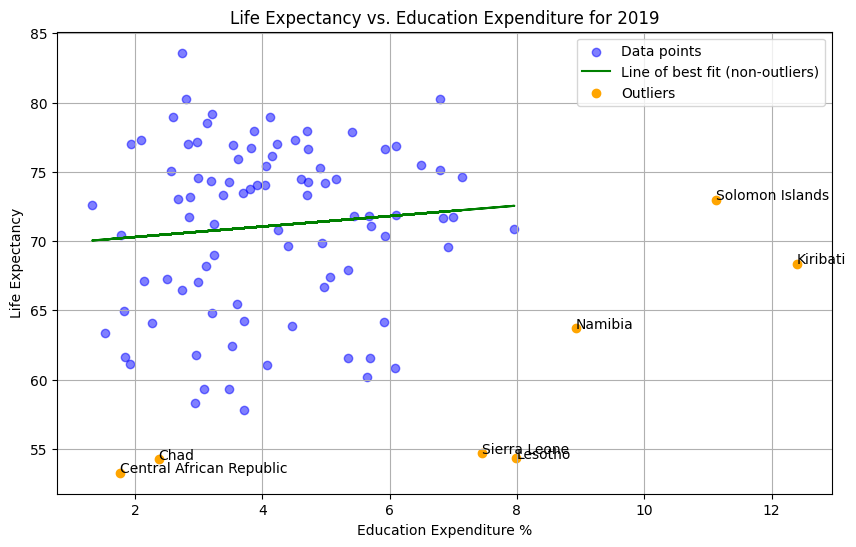

New Pearson correlation (Education Expenditure % vs. Life Expectancy) without outliers: 0.09258056910383312


In [ ]:
recent_data = recent_data.dropna(subset=['Life Expectancy', 'Education Expenditure %'])

# Outliers via Z-scores for Education Expenditure
z_scores_edu = np.abs(zscore(recent_data[['Education Expenditure %', 'Life Expectancy']]))
outliers_edu = (z_scores_edu > 2).any(axis=1)

outlier_data_edu = recent_data[outliers_edu]
x_outliers_edu = outlier_data_edu['Education Expenditure %']
y_outliers_edu = outlier_data_edu['Life Expectancy']
non_outlier_data_edu = recent_data[~outliers_edu]
x_non_outliers_edu = non_outlier_data_edu['Education Expenditure %']
y_non_outliers_edu = non_outlier_data_edu['Life Expectancy']

plt.figure(figsize=(10, 6))
plt.scatter(x_non_outliers_edu, y_non_outliers_edu, label='Data points', color='blue', alpha=0.5)
m_non_outliers_edu, b_non_outliers_edu = np.polyfit(x_non_outliers_edu, y_non_outliers_edu, 1)
plt.plot(x_non_outliers_edu, m_non_outliers_edu*x_non_outliers_edu + b_non_outliers_edu, color='green', label='Line of best fit (non-outliers)')

plt.scatter(x_outliers_edu, y_outliers_edu, label='Outliers', color='orange')
for i in range(len(outlier_data_edu)):
    plt.annotate(outlier_data_edu['Country Name'].iloc[i], (x_outliers_edu.iloc[i], y_outliers_edu.iloc[i]), fontsize=10, alpha=1, color='black')

plt.xlabel('Education Expenditure %')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Education Expenditure for 2019')
plt.legend()
plt.grid(True)
plt.show()

# New Pearson correlation for non-outliers
new_corr_edu, _ = pearsonr(x_non_outliers_edu, y_non_outliers_edu)
print(f'New Pearson correlation (Education Expenditure % vs. Life Expectancy) without outliers: {new_corr_edu}')